In [28]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from numba import jit, cuda
import os
from sklearn.utils import shuffle

In [29]:
import tensorflow as tf

In [30]:
from tensorflow import keras

In [31]:
import os 
import pandas as pd
l=[]
j=os.listdir(r"C:\Users\ahmed hatem\Downloads\GP\ready for models 0.9")
for i in range(0,len(j)):
    os.chdir(r"C:\Users\ahmed hatem\Downloads\GP\ready for models 0.9")
    df = pd.read_csv(j[i])
    #df=pd.concat(df)
    col=df.columns
    l.append(df)
df=pd.concat(l,axis=0,ignore_index=True)
df=df.drop(['X1','Y  V','Y.1','Unnamed: 2','V.1'],axis=1)


In [32]:
df

,res name|_x,total ASA|_x,b-bone ASA|_x,s-chain ASA|_x,polar ASA|_x,n-polar ASA|_x,total RASA|_x,b-bone RASA|_x,s-chain RASA|_x,polar RASA|_x,...,K.1_y,M.1_y,F.1_y,P.1_y,S.1_y,T.1_y,W.1_y,Y.1_y,V.1_y,prediction
0,1.000000e+19,78.1550,35.2660,42.8890,23.2580,54.8970,72.8780,81.40700,67.09800,74.61500,...,0,0,47,0,0,0,0,29.0,0.0,0
1,3.276800e+04,30.5580,8.6987,21.8590,7.9745,22.5840,23.2450,24.08300,22.92800,29.10400,...,20,12,6,0,0,0,0,5.0,0.0,0
2,2.251800e+15,48.9070,1.1604,47.7460,1.1604,47.7460,28.2040,3.73360,33.54600,4.45620,...,19,0,1,9,6,1,0,0.0,10.0,1
3,2.621440e+05,52.8850,11.2610,41.6240,6.1703,46.7150,38.7180,32.98600,40.62900,10.97900,...,1,0,0,0,1,5,0,0.0,1.0,1
4,2.097152e+06,79.0790,22.3060,56.7730,49.0200,30.0590,68.5850,54.59100,76.26700,78.59600,...,19,0,1,9,6,1,0,0.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128453,2.621440e+05,42.5170,1.3542,41.1630,9.9299,32.5880,31.1280,3.96660,40.17900,17.66900,...,0,0,0,0,0,0,0,0.0,0.0,0
128454,8.000000e+00,4.6862,0.0000,4.6862,0.0000,4.6862,2.3323,0.00000,2.80170,0.00000,...,0,0,0,11,20,0,0,0.0,0.0,1
128455,1.801440e+16,9.8439,9.5619,0.2820,9.2832,0.5607,5.5343,29.25900,0.19423,33.44100,...,0,0,0,37,0,54,0,0.0,0.0,0
128456,1.000000e+00,49.0180,0.1510,48.8670,0.1510,48.8670,36.6410,0.45897,48.44100,0.72042,...,46,0,0,0,0,0,0,0.0,0.0,1


In [33]:
df.dropna( axis=0, inplace=True)
df

,res name|_x,total ASA|_x,b-bone ASA|_x,s-chain ASA|_x,polar ASA|_x,n-polar ASA|_x,total RASA|_x,b-bone RASA|_x,s-chain RASA|_x,polar RASA|_x,...,K.1_y,M.1_y,F.1_y,P.1_y,S.1_y,T.1_y,W.1_y,Y.1_y,V.1_y,prediction
0,1.000000e+19,78.1550,35.2660,42.8890,23.2580,54.8970,72.8780,81.40700,67.09800,74.61500,...,0,0,47,0,0,0,0,29.0,0.0,0
1,3.276800e+04,30.5580,8.6987,21.8590,7.9745,22.5840,23.2450,24.08300,22.92800,29.10400,...,20,12,6,0,0,0,0,5.0,0.0,0
2,2.251800e+15,48.9070,1.1604,47.7460,1.1604,47.7460,28.2040,3.73360,33.54600,4.45620,...,19,0,1,9,6,1,0,0.0,10.0,1
3,2.621440e+05,52.8850,11.2610,41.6240,6.1703,46.7150,38.7180,32.98600,40.62900,10.97900,...,1,0,0,0,1,5,0,0.0,1.0,1
4,2.097152e+06,79.0790,22.3060,56.7730,49.0200,30.0590,68.5850,54.59100,76.26700,78.59600,...,19,0,1,9,6,1,0,0.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128453,2.621440e+05,42.5170,1.3542,41.1630,9.9299,32.5880,31.1280,3.96660,40.17900,17.66900,...,0,0,0,0,0,0,0,0.0,0.0,0
128454,8.000000e+00,4.6862,0.0000,4.6862,0.0000,4.6862,2.3323,0.00000,2.80170,0.00000,...,0,0,0,11,20,0,0,0.0,0.0,1
128455,1.801440e+16,9.8439,9.5619,0.2820,9.2832,0.5607,5.5343,29.25900,0.19423,33.44100,...,0,0,0,37,0,54,0,0.0,0.0,0
128456,1.000000e+00,49.0180,0.1510,48.8670,0.1510,48.8670,36.6410,0.45897,48.44100,0.72042,...,46,0,0,0,0,0,0,0.0,0.0,1


In [34]:
x = df.iloc[:, 0 :170]
y =df['prediction']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)


In [36]:
clf = RandomForestClassifier(n_estimators = 100)  

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)

ACCURACY OF THE MODEL:  90.96380802517703


IndexError: list index out of range

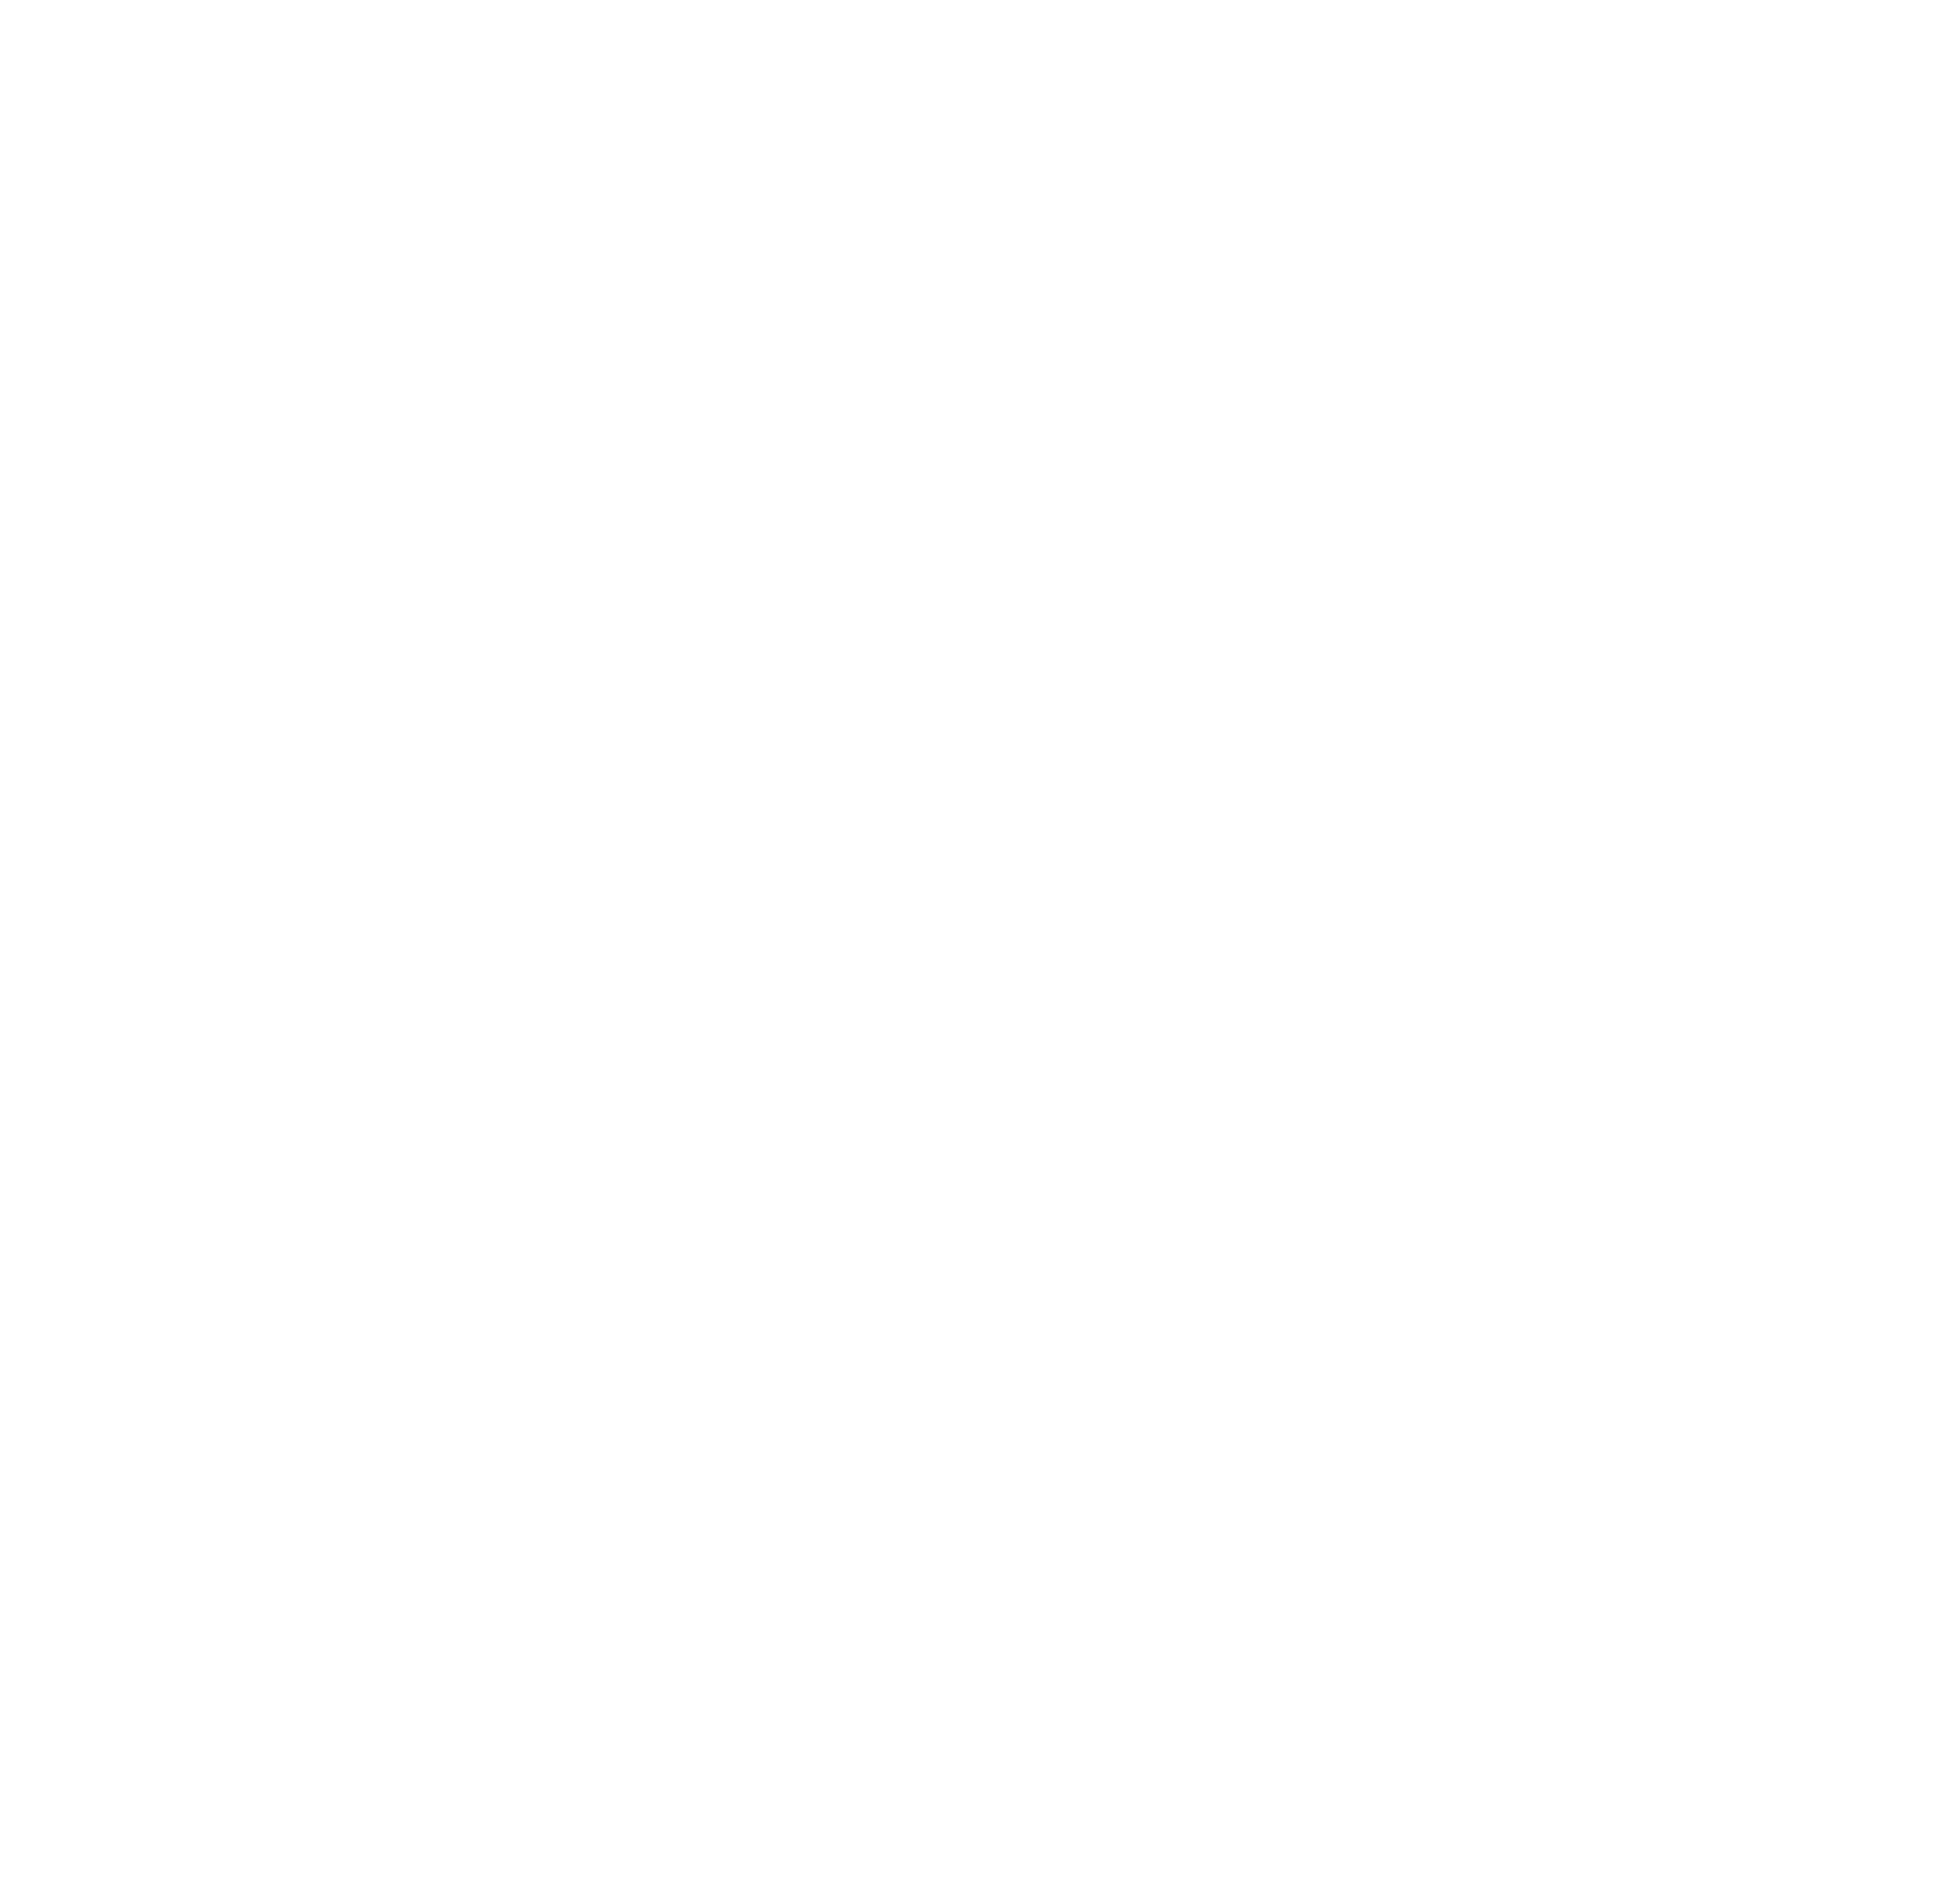

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


fn=x.columns
cn=['prediction']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('rf_individualtree.png')

In [46]:
clf.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=1426308036)